# 4. 데이터 탐색 이해와 실무

## 4.2 일변량 시각화

### 강의교안
 1. 범주형 일변량 시각화
    - 파이차트
    - 막대그래프
    
 2. 연속형 일변량 시각화
    -히스토그램
    -커널밀도그래프
    -박스플롯

### 실습 내용 요약
   - 예제 데이터 기반의 일변량 시각화 방안에 대한 전반적 실습
   
### 실습데이터
   - 데이터 : Boston Housing Price
   - 데이터 설명 : https://lib.stat.cmu.edu/datasets/boston
   - 데이터 로딩 방법 링크: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
   
### 실습 시 활용 패키지
   - pandas
   - numpy
   - matplotlib
   - seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 실습활용을 위한 sklearn 패키지내 보스턴 주택가격 데이터 로딩
# sklearn 상위버전(1.2)에서 데이터 셋을 더이상 제공하지 않음

# from sklearn.datasets import load_boston
# with warnings.catch_warnings():
#     warnings.filterwarnings('ignore')
#     data = load_boston()

# 상위버전 이용시 sklearn 참고 페이지 내 코드 실행하여 데이터 로딩
# data 및 target을 Dataframge으로 생성후 추후 marge

data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2,:2]])
target = raw_df.values[1::2, 2] 

# 데이터 프레임 생성 및 Mearge
housing = pd.merge(pd.DataFrame(data), pd.DataFrame(target), left_index =True, right_index=True, how='inner')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 데이터 컬럼 설명

#### 보스턴 인근 Town 별 주택 가격 밎 관련 정보 데이터셋

- CRIM :    per capita crime rate by town
- ZN :      proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS :   proportion of non-retail business acres per town
- CHAS :    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX :     nitric oxides concentration (parts per 10 million)
- RM :      average number of rooms per dwelling
- AGE :     proportion of owner-occupied units built prior to 1940
- DIS :     weighted distances to five Boston employment centres
- RAD :     index of accessibility to radial highways
- TAX :     full-value property-tax rate per 10,000 dollar
- PTRATIO : pupil-teacher ratio by town
- B :       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT :   persent lower status of the population
- MEDV :    Median value of owner-occupied homes in 1000 dollar's

### 범주형 일변량 시각화
   - 파이차트
   - 막대그래프    

In [3]:
# 데이터 copy
housing_data = housing.copy()

# 데이터 통계량 확인
housing_data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# 파이 차트(Pie Chart) 실습
# 실습을 위해 범주형 데이터로 변환
bins = [0, 20, 40, 60, 80, 100]
names = ['G1', 'G2', 'G3', 'G4', 'G5']
housing_data['AGE_G5'] = pd.cut(housing_data['AGE'], bins, labels = names)
housing_data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_5,AGE_G5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,G4,G4
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,G4,G4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,G4,G4
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,G3,G3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,G3,G3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,G4,G4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,G4,G4
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,G5,G5
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,G5,G5


In [13]:
# 파이차트(Pie Chart) 생성을 위해 빈도 table 생성
pie_df_G5 = pd.DataFrame(housing_data['AGE_G5'].value_counts())
# pie 차트 생성 시 범주 별 크기에 따른 sorting 후 plotting 
pie_df_G5

,AGE_G5
G5,240
G4,81
G3,76
G2,75
G1,34


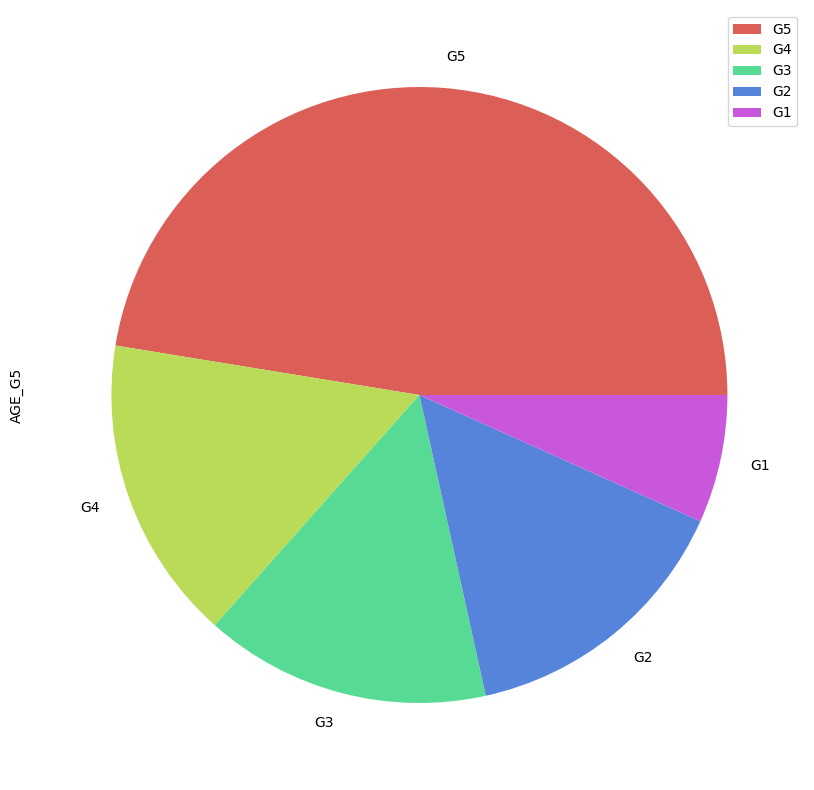

In [29]:
# pie 차트 생성
pie_df_G5.plot.pie(y = 'AGE_G5', figsize=(10,10), colors = sns.color_palette('hls', len(pie_df_G5)))
plt.show()

   - G1에서 G5까지 범주명 숫자가 클수록 Town 내 오래된 주택의 비율이 많음을 의미함
   - G5(Town 내 80% 이상이 1940년도 이전 건축된 건물)이 비율이 가장크고, G1(Town내 20% 이하가 1940년도 이전 건축된 건물)이 가장 작음

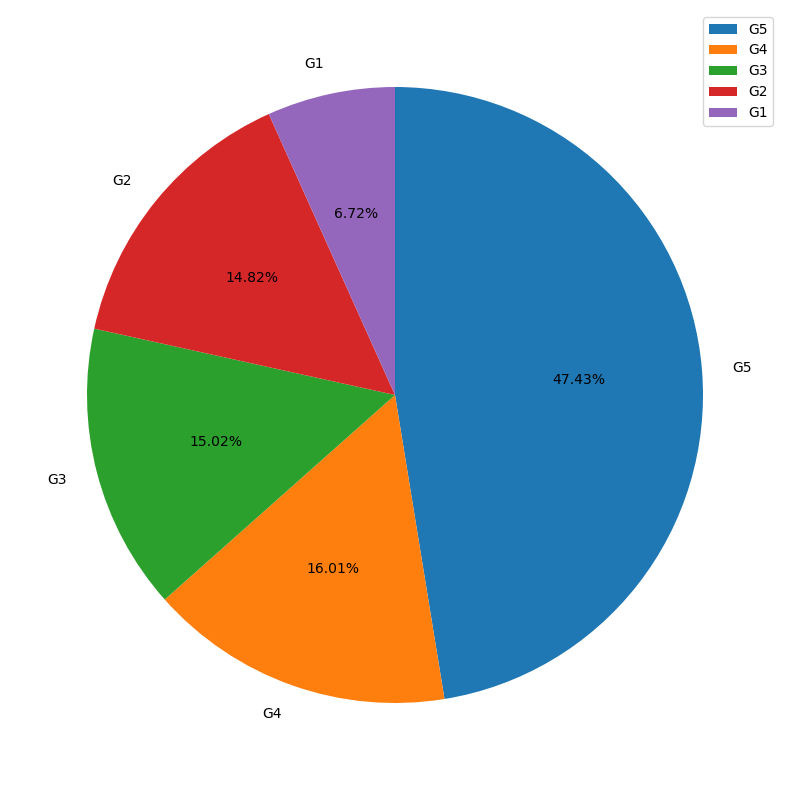

In [21]:
# matplotlib로 생성시, 조금 더 많은 정보를 시각화 옵션에 추가 가능
# 데이터 시각화 이해와 실무에서 matplotlib에 대해 강의 예정
# =================================================================
# 파이차트 생성
plt.figure(figsize=(10,10)) ## 캔버스 생성

plt.pie(pie_df_G5['AGE_G5'], ## 차트 출력
       labels = pie_df_G5.index, ##label 출력
       startangle=90, ##시작점을  90도(degree)로  지정
       counterclock=False, ## 시계방향
       autopct='%.2f%%' ## 퍼센티지 출력
       )
plt.legend() # legend 삽입
plt.show()

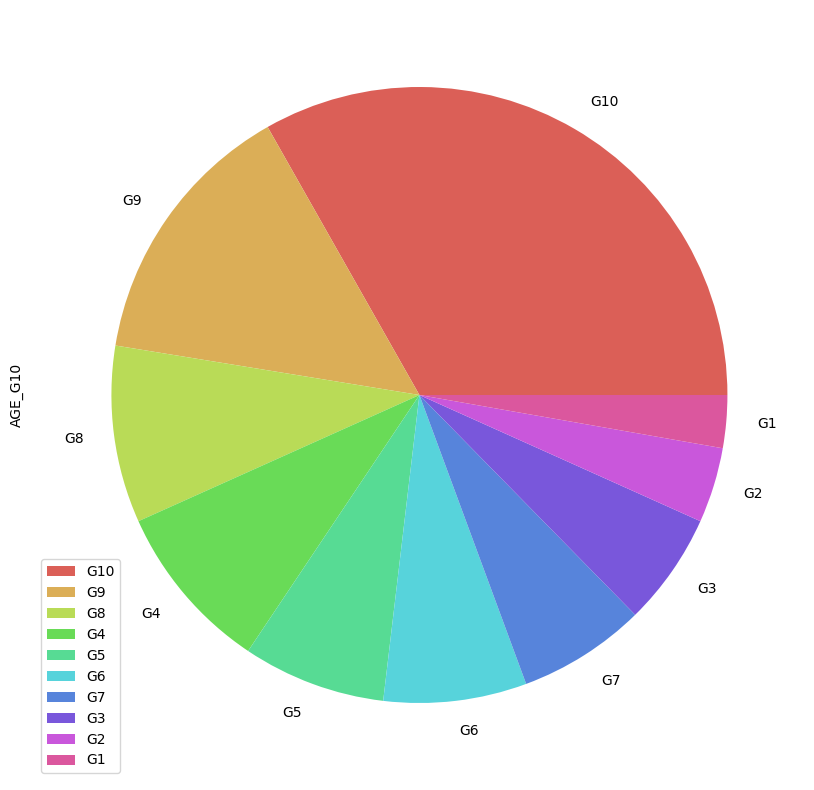

In [27]:
# 범주형 데이터를 좀 더 세분화 하여 변환
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
names = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
housing_data['AGE_G10'] = pd.cut(housing_data['AGE'], bins, labels = names)
housing_data

#파이차트 생성을 위해 빈도테이블 생성
pie_df_G10 = pd.DataFrame(housing_data['AGE_G10'].value_counts())

#파이차트 생성
pie_df_G10.plot.pie(y="AGE_G10", figsize=(10, 10), colors = sns.color_palette('hls', len(pie_df_G10)))
plt.show()

   - 5개의 범주인 경우보다, 범주별 비교가 어려워 보임
   - 또한 G4~G7까지 대부분 비율이 유사하게 보이므로 비교가 쉽지 않음
   - 데이터 크기가 유사할 경우, 막대 그래프를 통해 크기차이를 비교할 수 있음

<AxesSubplot:>

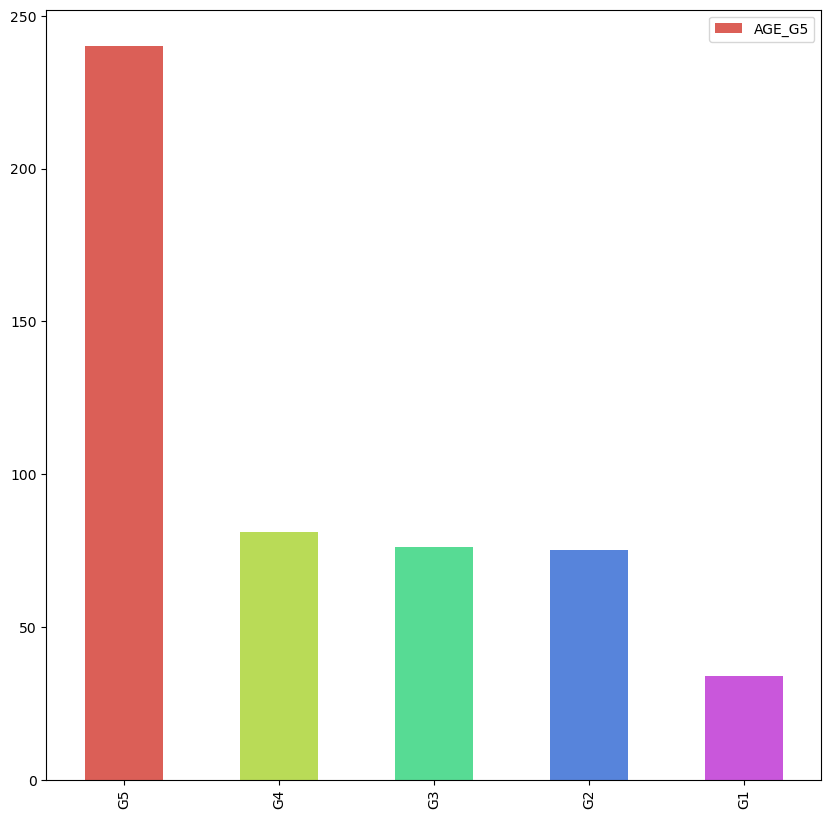

In [32]:
# 막대그래프 실습
pie_df_G5.plot.bar(y = 'AGE_G5', figsize=(10,10), color = sns.color_palette('hls', len(pie_df_G5)))


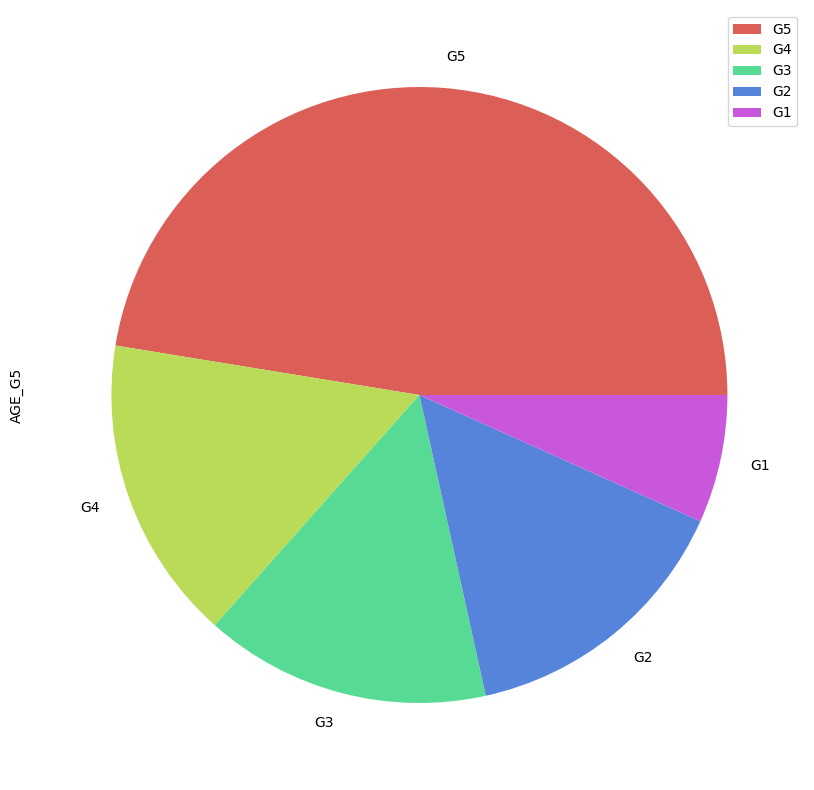

In [34]:
#파이차트와 비교
pie_df_G5.plot.pie(y = 'AGE_G5', figsize=(10,10), colors = sns.color_palette('hls', len(pie_df_G5)))
plt.show()

   - G4, G3, G2의 비교가 어려운 파이차트 대비, 막대 그래프는 비교적 비교가 수월

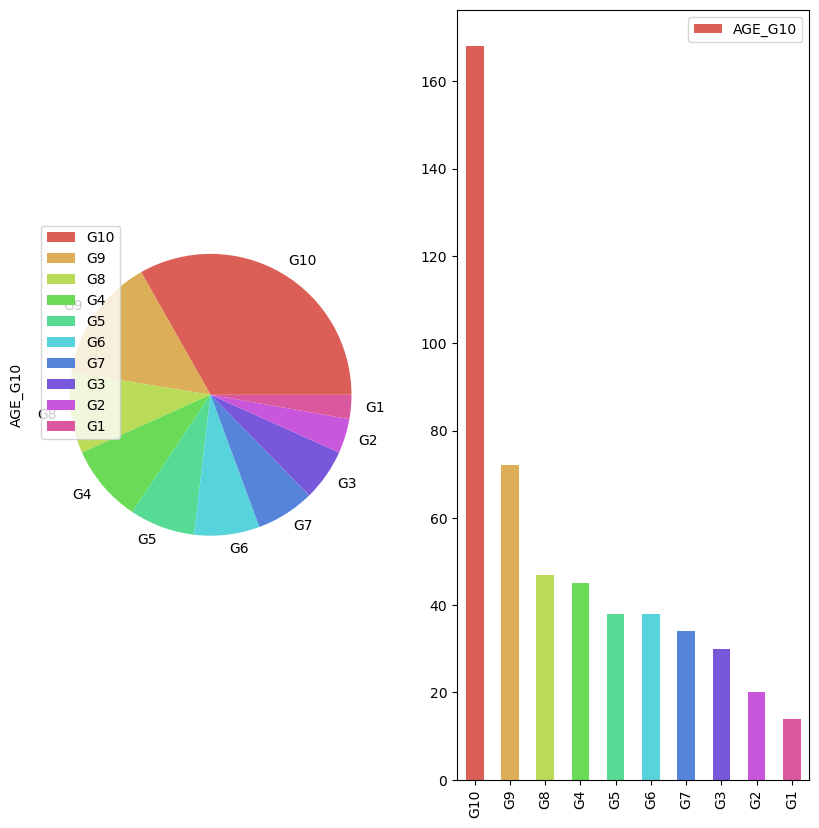

In [38]:
# 막대그래프(Bar plot) 실습 및 파이차트 비교
# 그래프 생성
fig, ax = plt.subplots(ncols=2, figsize=(20,10))

pie_df_G10.plot.pie(y="AGE_G10", figsize=(10, 10), colors = sns.color_palette('hls', len(pie_df_G10)), ax = ax[0])
pie_df_G10.plot.bar(y="AGE_G10", figsize=(10, 10), color = sns.color_palette('hls', len(pie_df_G10)), ax = ax[1])
plt.show()

   - G4, G5, G6, G7의 비교가 어려운 파이차트 대비, 막대그래프에서는 비교적 비교가 수월

In [35]:
pie_df_G10

,AGE_G10
G10,168
G9,72
G8,47
G4,45
G5,38
G6,38
G7,34
G3,30
G2,20
G1,14


### 연속형 일변량 시각화
   - 히스토그램
   - 커널밀도 그래프
   - 박스플롯

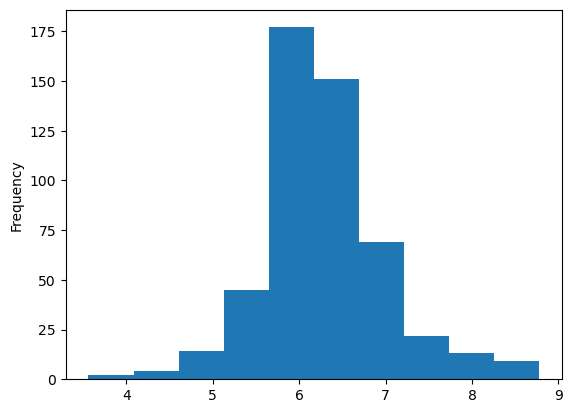

In [39]:
## 히스토그램 시각화
housing_data['RM'].plot.hist()
plt.show()

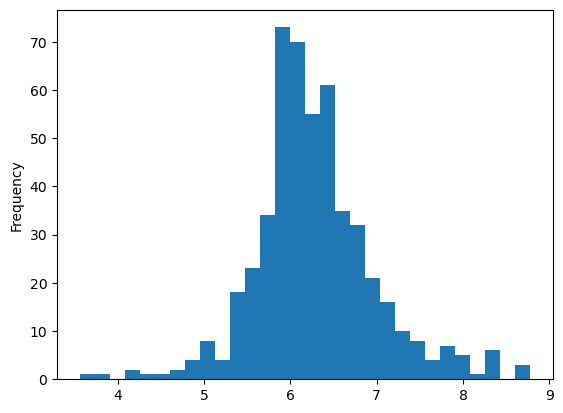

In [40]:
# 구간을 세분화하여 시각화
housing_data['RM'].plot.hist(bins=30)
plt.show()

   - 막대그래프와 유사한 모양을 지니고 있지만 사용목적과 그래프의 형태차이를 보임
   - 연속형인 RM(평균 방 개수) 변수의 분포를 세분화 하여 구간으로 변경

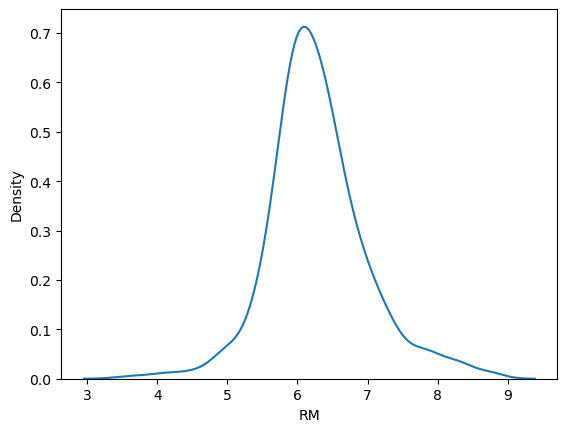

In [42]:
# 커널밀도추정 시각화
sns.kdeplot(housing_data['RM'])
plt.show()

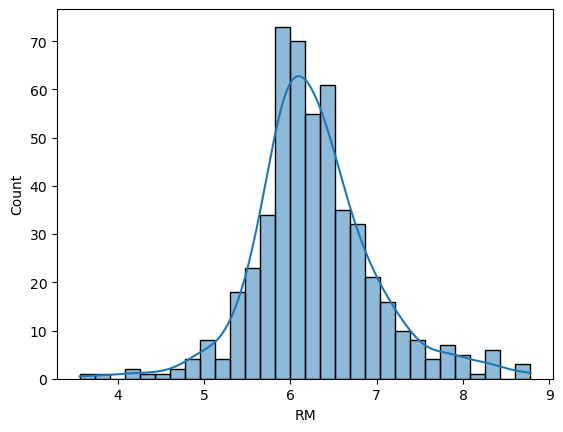

In [44]:
# 히스토그램 및 kde 함꺠 시각화
sns.histplot(housing_data['RM'], bins = 30, kde = True)
plt.show()

   - 관측된 RM 변수를 기반으로 커널밀도 추정 결과의 시각화
   - 히스토그램 분포를 완만한 곡선으로 표현


#### 4.1 일변량 비시각화 교안 내용 참고
   - CRIM 컬럼의  왜도 첨도 확인결과 왼쪽으로 치우쳐 있고 뽀족한 모양의 분포를 지닌 변수임을 확인
      - skewness : 5.22
      - kurtosis : 37.13

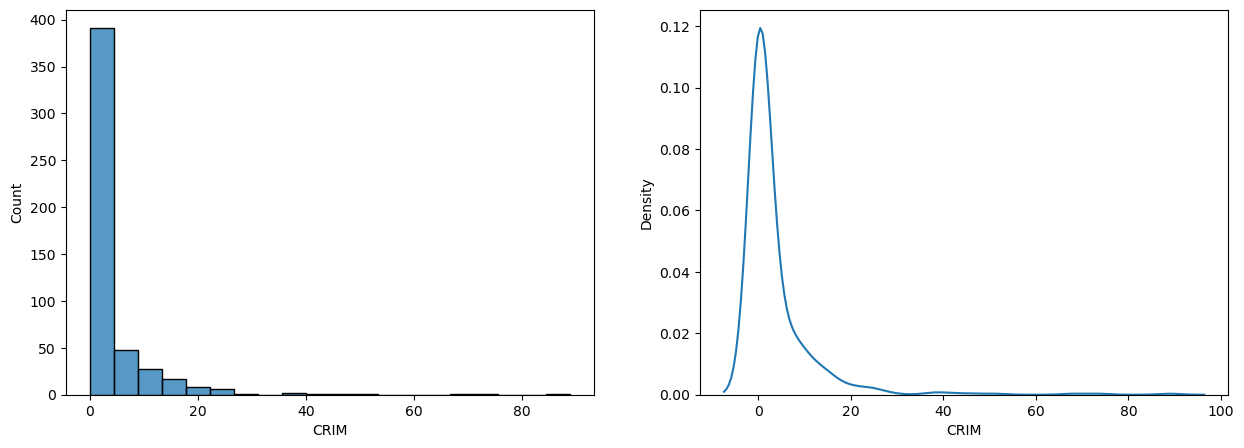

In [48]:
# CRIM 변수 시각화
fig, ax = plt.subplots(ncols=2, figsize= (15,5))

sns.histplot(housing_data['CRIM'], bins = 20, ax=ax[0])
sns.kdeplot(housing_data['CRIM'], ax=ax[1])

plt.show()

   - 왜도 및 첨도 값으로 파악하여 데이터 분포 모양을 확인하는 비시각화 방안
   - 시각화를 통하여 실제 데이터의 분포 형상 파악
   - 즉, 시각화를 통해 더 빠르게 데이터 분포 및 모양등의 정보를 빠르게 파악가능

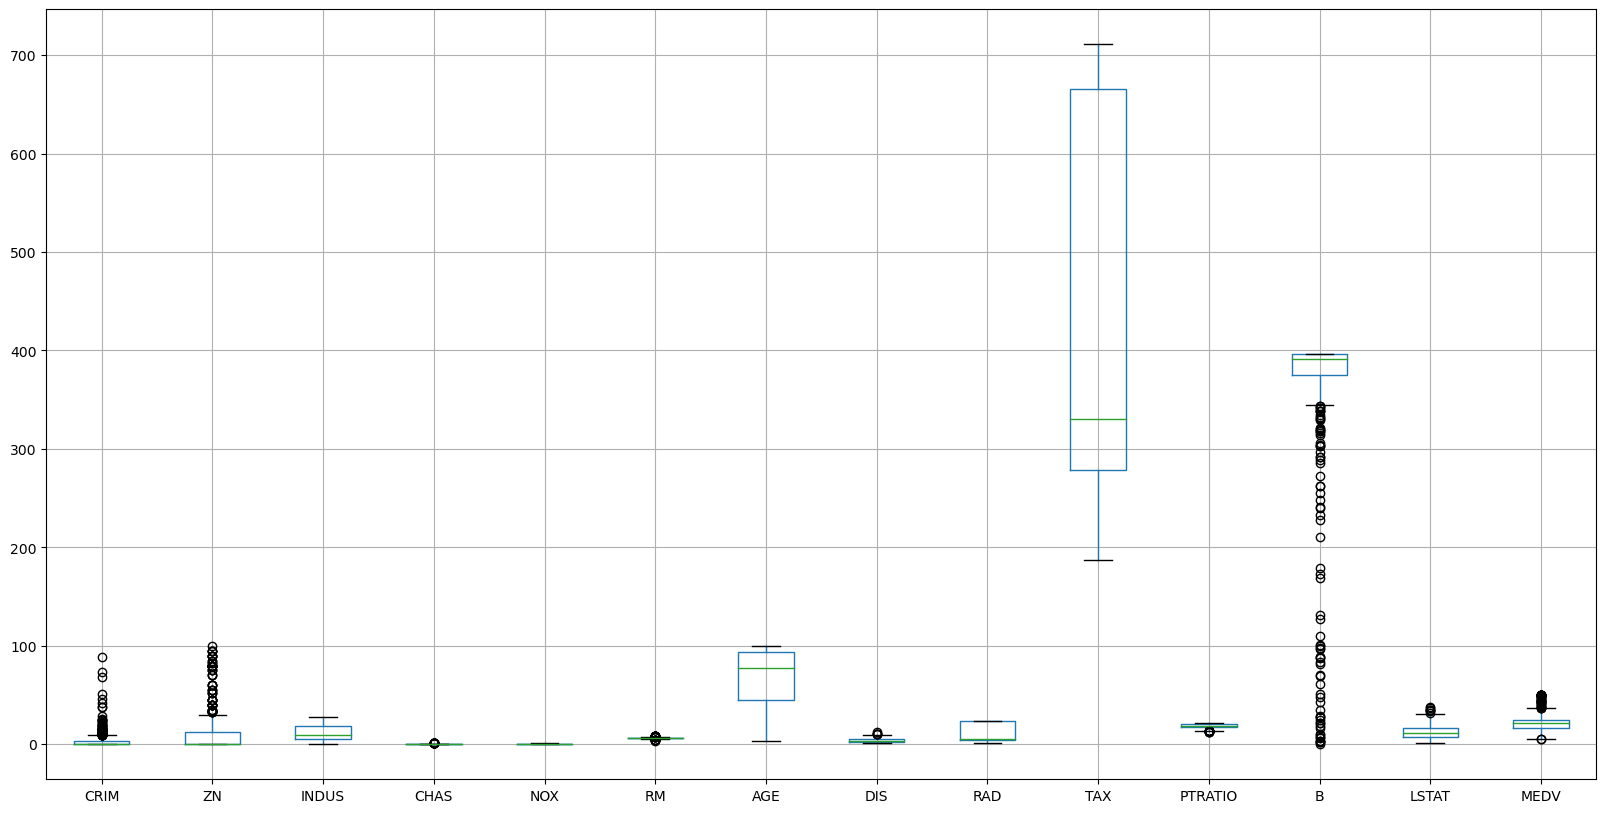

In [50]:
# Box plot 시각화
housing_data.boxplot(figsize=(20,10))
plt.show()

 - 변수 별 관측치 범위가 모두 다르기 때문에, 개락적 파악가능
 - 변수별 box plot 시각화 필요

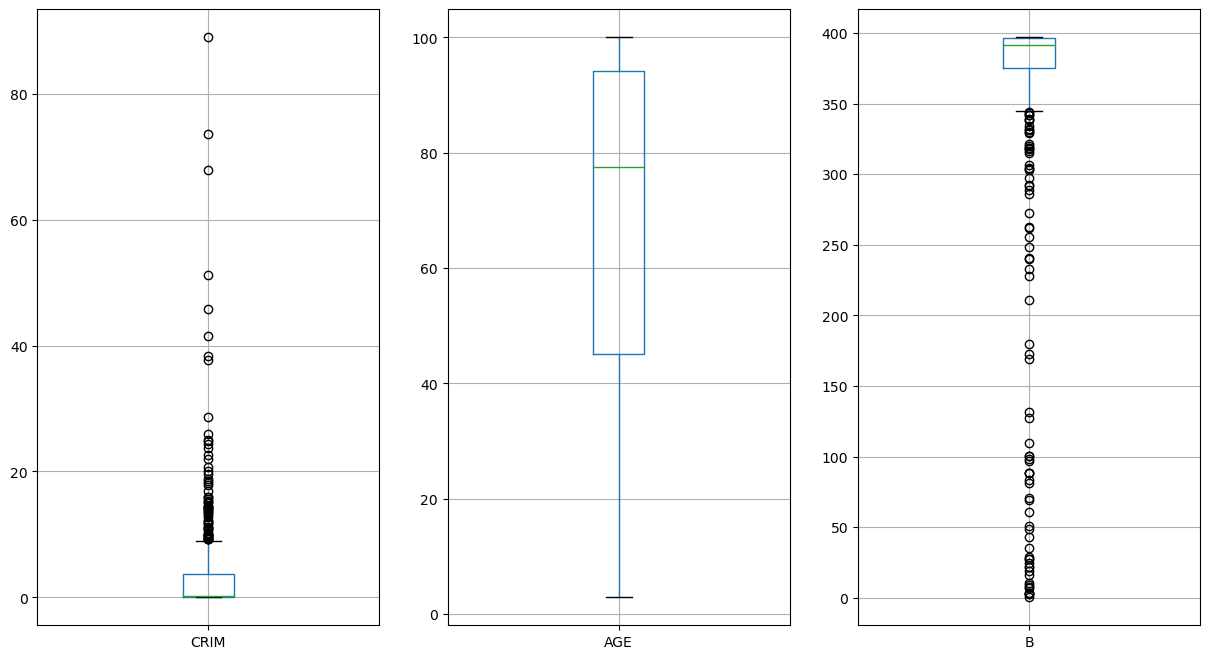

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


In [53]:
# 개별 변수별 시각화
fig, ax = plt.subplots(ncols=3,figsize=(15,8))

housing_data[['CRIM']].boxplot(ax=ax[0])
housing_data[['AGE']].boxplot(ax=ax[1])
housing_data[['B']].boxplot(ax=ax[2])

plt.show()

print(housing_data['AGE'].describe())

   - 박스플롯 시각화를 기반으로 중앙값을 비롯한 사분위 수 및 이상치 확인에 용이
   - AGE 변수의 경우 IQR 기반의 이상치로 판단된 데이터 없음 (관측치 최대 : 100, 최소 : 2.90)

In [55]:
# AGE IQR 기반 범위
q1 = housing_data['AGE'].quantile(0.25)
q3 = housing_data['AGE'].quantile(0.75)
iqr=q3-q1
print('minimum :', q1-1.5*iqr)
print('maximim :', q3 + 1.5*iqr)

minimum : -28.54999999999999
maximim : 167.64999999999998
